In [1]:
import mikeio
from watobs import DHIAltimetryRepository
import numpy as np
import matplotlib.pyplot as plt
import os
api_key = os.getenv('DHI_ALTIMETRY_API_KEY')

In [2]:
df = mikeio.open("../output/Area.dfsu")
area_box = [df.geometry.element_coordinates[:,0].min(),df.geometry.element_coordinates[:,1].min(),
            df.geometry.element_coordinates[:,0].max(),df.geometry.element_coordinates[:,1].max()]
area_str = f"bbox={area_box[0]},{area_box[1]},{area_box[2]},{area_box[3]}"


start = "2014-01-01"
end = "2024-01-01"

In [3]:
# Set up altimetry repository
repo = DHIAltimetryRepository(api_key=api_key)
repo.get_satellites()

,long_name
short_name,
gs,Geosat
e1,ERS-1
tx,TOPEX
pn,Poseidon
e2,ERS-2
g1,GFO
j1,Jason-1
n1,Envisat
j2,Jason-2


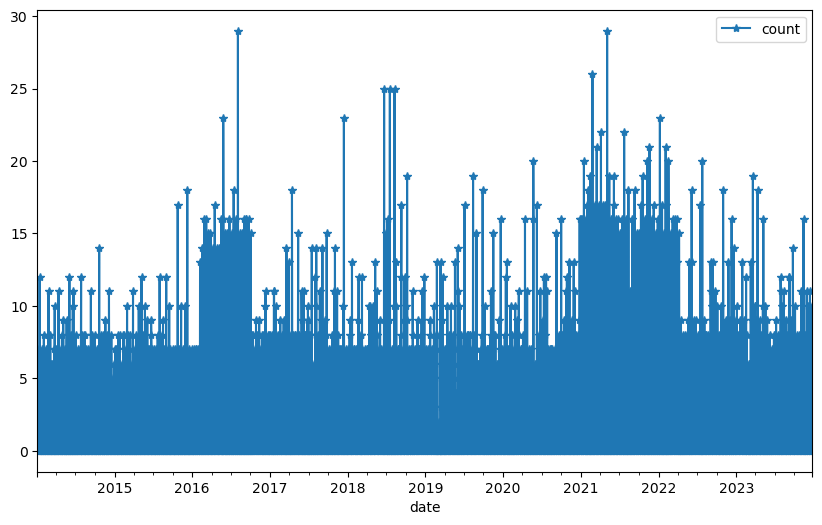

In [4]:
# Look at availability in the area and time period of interest
df = repo.get_daily_count(area=area_str, start_time=start,end_time=end)
df.plot(marker="*", figsize=(10,6));

In [5]:
# Download the data
data = repo.get_altimetry_data(area=area_str, start_time=start,end_time=end)
data.df

Succesfully retrieved 9569 records from API in 6.92 seconds


,longitude,latitude,water_level,significant_wave_height,wind_speed,distance_from_land,water_depth,satellite,quality,absolute_dynamic_topography,water_level_rms,significant_wave_height_raw,significant_wave_height_rms,wind_speed_raw,wind_speed_rads,quality_swh,quality_water_level,quality_wind_speed
datetime,,,,,,,,,,,,,,,,,,
2014-01-04 16:04:24.016,12.426209,55.536950,0.407,0.028,3.731,7500.0,-9.63,j2,2,0.444,0.049,0.000,0.455,3.762,0.85,2,2,2
2014-01-04 16:04:25.036,12.490434,55.498956,0.350,0.632,5.005,8740.0,-12.00,j2,0,0.387,0.060,0.595,0.505,5.045,4.25,0,0,0
2014-01-04 16:04:26.056,12.554527,55.460923,0.321,0.367,5.156,10783.0,-14.88,j2,0,0.357,0.070,0.334,0.521,5.197,4.26,0,0,0
2014-01-04 16:04:27.076,12.618489,55.422852,0.358,0.473,5.337,13150.0,-14.00,j2,0,0.395,0.053,0.439,0.649,5.379,5.26,0,0,0
2014-01-04 16:04:28.096,12.682320,55.384743,0.372,0.028,5.551,8409.0,-12.00,j2,0,0.408,0.061,0.000,0.488,5.594,4.63,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25 04:13:08.994,12.540334,55.332029,0.373,0.873,NaN,6050.0,-21.18,sa,1,0.341,0.046,0.827,0.407,11.508,10.93,1,1,2
2023-12-25 04:13:10.033,12.507634,55.391900,0.341,1.128,NaN,6505.0,-19.00,sa,1,0.309,0.041,1.085,0.442,10.795,10.22,1,1,2
2023-12-25 04:13:11.073,12.474849,55.451764,0.351,0.993,NaN,9363.0,-14.50,sa,1,0.319,0.036,0.949,0.269,12.691,12.12,1,1,2


In [6]:
# Take relevant data
wl_df = data.df.loc[:,["longitude","latitude","water_level","satellite","quality_water_level"]]
wl_df

,longitude,latitude,water_level,satellite,quality_water_level
datetime,,,,,
2014-01-04 16:04:24.016,12.426209,55.536950,0.407,j2,2
2014-01-04 16:04:25.036,12.490434,55.498956,0.350,j2,0
2014-01-04 16:04:26.056,12.554527,55.460923,0.321,j2,0
2014-01-04 16:04:27.076,12.618489,55.422852,0.358,j2,0
2014-01-04 16:04:28.096,12.682320,55.384743,0.372,j2,0
...,...,...,...,...,...
2023-12-25 04:13:08.994,12.540334,55.332029,0.373,sa,1
2023-12-25 04:13:10.033,12.507634,55.391900,0.341,sa,1
2023-12-25 04:13:11.073,12.474849,55.451764,0.351,sa,1


In [7]:
# Filter in quality flag and distance from land (to only get water areas)
wl_df_filtered = wl_df[(data.df.loc[:,"quality_water_level"] < 2) & (data.df.loc[:,"distance_from_land"]>0.0)]
wl_df_filtered

,longitude,latitude,water_level,satellite,quality_water_level
datetime,,,,,
2014-01-04 16:04:25.036,12.490434,55.498956,0.350,j2,0
2014-01-04 16:04:26.056,12.554527,55.460923,0.321,j2,0
2014-01-04 16:04:27.076,12.618489,55.422852,0.358,j2,0
2014-01-04 16:04:28.096,12.682320,55.384743,0.372,j2,0
2014-01-04 16:04:29.116,12.746020,55.346596,0.350,j2,1
...,...,...,...,...,...
2023-12-24 10:02:39.000,12.746424,55.334674,0.739,6a,1
2023-12-25 04:13:08.994,12.540334,55.332029,0.373,sa,1
2023-12-25 04:13:10.033,12.507634,55.391900,0.341,sa,1


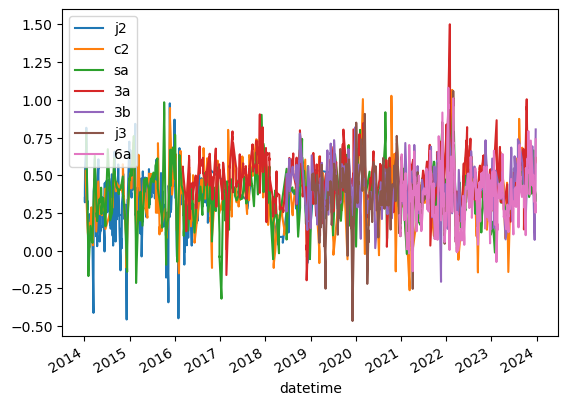

In [8]:
# Plot availability of data
for s in wl_df_filtered.satellite.unique():
    wl_df_filtered[wl_df_filtered.satellite == s].loc[:,"water_level"].plot(label=s)
plt.legend()

In [13]:
# Save data
sats=wl_df_filtered["satellite"].unique()

for i in range(len(sats)):
    wl_df_filtered.loc[wl_df_filtered["satellite"] == sats[i]].drop(columns=["satellite"]).to_csv(f"../observations/Altimetry_wl_{sats[i]}.csv")